In [1]:
'''
ATTRIBUTION: Proper attribution requires clear indication of the data source as "www.macrotrends.net".
A "dofollow" backlink to the originating page is also required if the data is displayed on a web page.
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [29]:
def mort_rate_corr(rate_term):
    # RATE TERM: 0.5year, 1year, ..., 30year
    mort_df = pd.read_csv(f'./MORTGAGE{rate_term}US.csv', header = None, names = ['Date', 'rates'], parse_dates = True)
    mort_df['Date'] = pd.to_datetime(mort_df['Date'])
    vix_df = pd.read_csv('./vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'])
    vix_df['Date'] = pd.to_datetime(vix_df['Date'])
    
    scatter = pd.merge(mort_df, vix_df, how = 'inner', on = 'Date')

    scatter = scatter.set_index(["Date"])
    scatter = scatter.resample("M").mean() 
    scatter.index = pd.to_datetime(scatter.index, format="%Y%m").to_period('M')

    m_rates = scatter['rates'].pct_change()[1:]
    m_vix = scatter['$VIX'].pct_change()[1:]
    corr_coef = np.corrcoef(m_rates, m_vix)[0][1]
    return mort_df, vix_df, m_rates, m_vix, corr_coef

In [49]:
mort_df, vix_df, m_rates, m_vix, corr_coef = mort_rate_corr(30)

(7306.0, 19285.0)

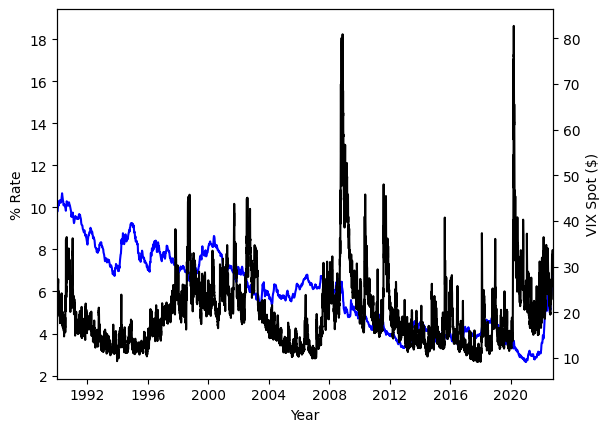

In [50]:
# PLOT LEFT: 30 YR RATE
# PLOT RIGHT: VIX spot price

fig, ax1 = plt.subplots()
ax1.plot(mort_df['Date'], mort_df['rates'], color = "blue")
ax1.set_xlabel("Year")

ax1.set_ylabel("% Rate")

ax2 = ax1.twinx()
ax2.plot(vix_df['Date'], vix_df['$VIX'], color = "black")

ax2.set_ylabel("VIX Spot ($)")

ax1.set_xlim(max(min(mort_df['Date']), min(vix_df['Date'])), max(mort_df['Date']))

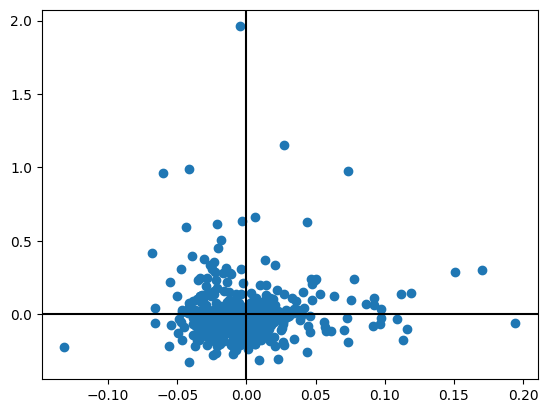

In [51]:
plt.scatter(m_rates, m_vix)
plt.axvline(color="black")
plt.axhline(color="black")
plt.show()

In [52]:
corr_coef

0.03325427467505962